<a href="https://colab.research.google.com/github/NeonLabs146/Neural-network/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Perceptron-single layer**

In [2]:
def step_function(weighted_sum):
    if weighted_sum > threshold:
        return 1
    else:
        return 0

def perceptron():
    weighted_sum = 0
    for x, w in zip(X_inputs, w_weights):
        weighted_sum += x*w
        print(weighted_sum)
    return step_function(weighted_sum)

In [3]:
X_inputs = [0.1, 0.5, 0.6]
w_weights = [0.4, 0.3, 0.6]
threshold = 0.5
output = perceptron()
#print("Output" +str(output))
print(f"The output of the perceptron is: {output}")

0.04000000000000001
0.19
0.55
The output of the perceptron is: 1


##**Activation functions**

<h4>1.  Activation Functions </h4>
<h4>2. Activation for Hidden Layers </h4>
<h4>3. Activation for Output Layers </h4>

**Activation Functions:**
An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

Sometimes the activation function is called a “transfer function.” If the output range of the activation function is limited, then it may be called a “squashing function.” Many activation functions are nonlinear and may be referred to as the “nonlinearity” in the layer or the network design.

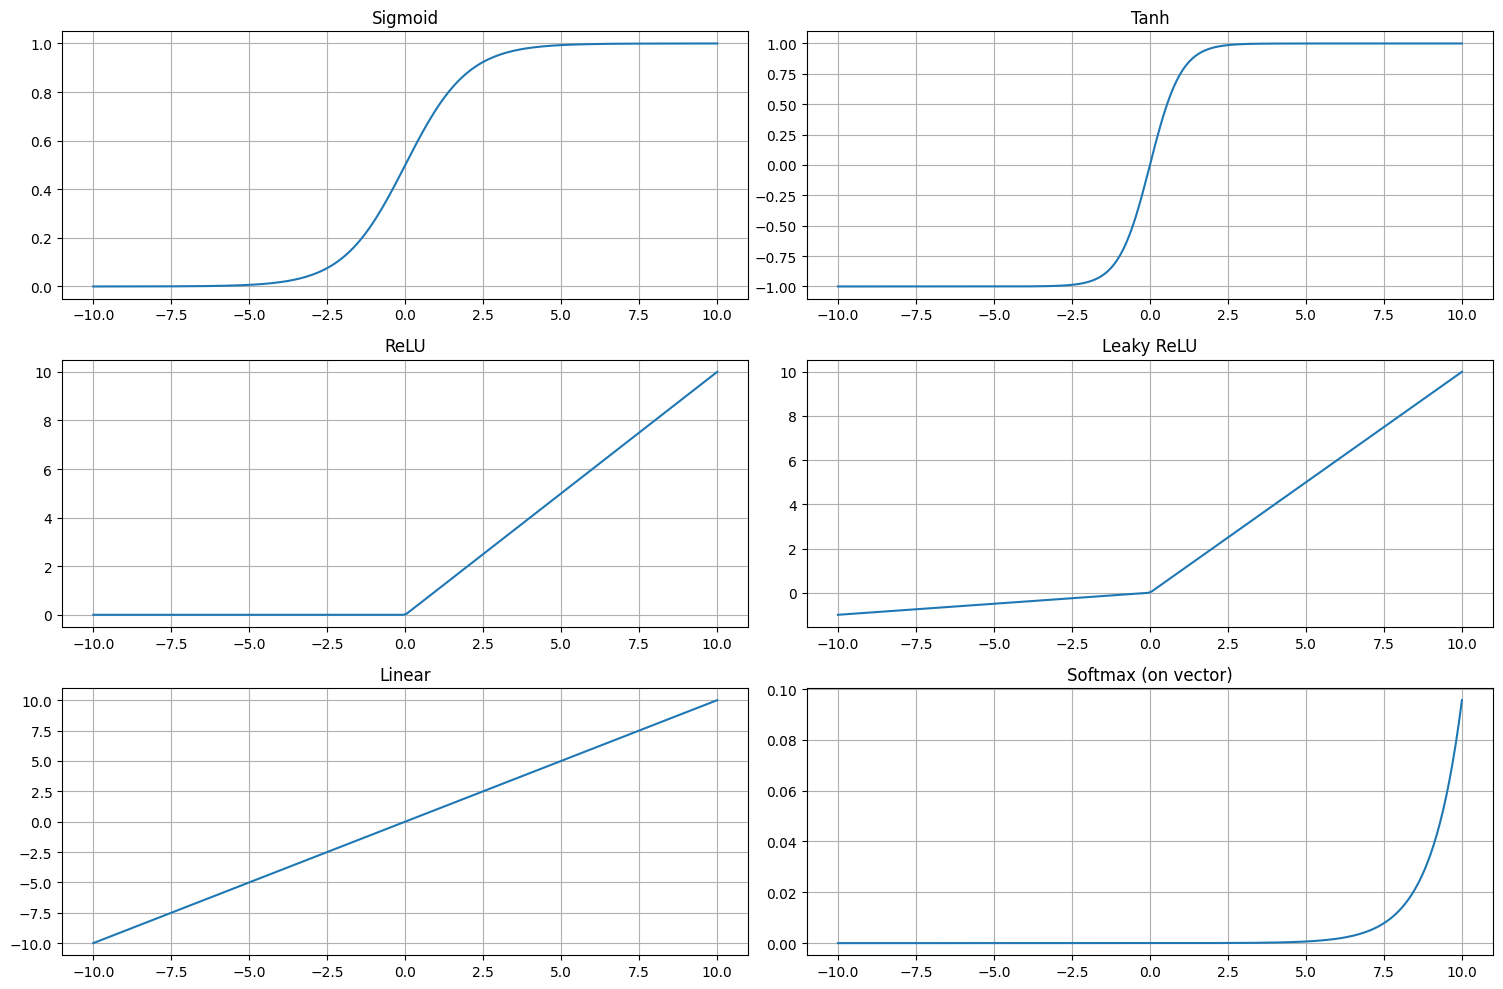

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.where(x > 0, x, 0.1 * x)

def linear(x):
    return x

def softmax(x):
    e_x = np.exp(x - np.max(x))  # stability trick
    return e_x / e_x.sum(axis=0)

# Plot all activation functions
x_vals = np.linspace(-10, 10, 200)

plt.figure(figsize=(15, 10))

activations = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'Leaky ReLU': leaky_relu,
    'Linear': linear,
    'Softmax (on vector)': lambda x: softmax(np.array([x1 for x1 in x]))  # for plotting purposes
}

for i, (name, func) in enumerate(activations.items()):
    plt.subplot(3, 2, i+1)
    y_vals = func(x_vals)
    plt.plot(x_vals, y_vals)
    plt.title(name)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
# -------------------------------------------
# Perceptron Class for Binary Classification
# -------------------------------------------

class PerceptronModel:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.zeros(input_size + 1)                    # +1 for bias
        self.lr = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return sigmoid(x)                                          # Using sigmoid for binary classification

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return 1 if self.activation(z) >= 0.5 else 0

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights[1:]) + self.weights[0]
                output = self.activation(z)
                error = target - output
                # Gradient descent update
                self.weights[1:] += self.lr * error * xi
                self.weights[0] += self.lr * error                  # bias

In [6]:
# ------------------------------
# Example: AND Logic Gate
# ------------------------------

# Inputs for AND gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# Output for AND gate
y = np.array([0, 0, 0, 1])

# Train model
model = PerceptronModel(input_size=2)
model.train(X, y)

# Test model
print("\nPredictions for AND gate:")
for xi in X:
    print(f"Input: {xi} => Predicted: {model.predict(xi)}")


Predictions for AND gate:
Input: [0 0] => Predicted: 0
Input: [0 1] => Predicted: 0
Input: [1 0] => Predicted: 0
Input: [1 1] => Predicted: 1


##**OR, NOT, NAND, NOR**##

#**Double Moon classification Experiment**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import seaborn as sns

class DoubleMoonExperiment:
    def __init__(self, r=10, w=6, d=1):
        """
        Initialize the double-moon classification problem

        Parameters:
        r: radius of each moon (default: 10)
        w: width of each moon (default: 6)
        d: vertical separation distance (default: 1)
        """
        self.r = r
        self.w = w
        self.d = d

    def generate_moon_points(self, n_points, region='A'):
        """Generate random points within a moon region"""
        points = []

        while len(points) < n_points:
            if region == 'A':
                # Region A: centered at origin, upper half
                x = np.random.uniform(-self.r, self.r)
                y_center = np.sqrt(self.r**2 - x**2)
                y = np.random.uniform(y_center - self.w/2, y_center + self.w/2)

                # Only keep points in upper half and within moon width
                if y >= 0 and y <= y_center + self.w/2:
                    points.append([x, y])

            else:  # Region B
                # Region B: offset by r in x, displaced by d in y, lower half
                x = np.random.uniform(0, 2*self.r)
                y_center = -np.sqrt(self.r**2 - (x - self.r)**2) - self.d
                y = np.random.uniform(y_center - self.w/2, y_center + self.w/2)

                # Only keep points in lower half and within moon width
                if y <= 0 - self.d and y >= y_center - self.w/2:
                    points.append([x, y])

        return np.array(points)

    def generate_dataset(self, n_train=1000, n_test=2000):
        """Generate training and test datasets"""
        # Training data
        train_A = self.generate_moon_points(n_train//2, 'A')
        train_B = self.generate_moon_points(n_train//2, 'B')

        X_train = np.vstack([train_A, train_B])
        y_train = np.hstack([np.ones(len(train_A)), np.zeros(len(train_B))])

        # Test data
        test_A = self.generate_moon_points(n_test//2, 'A')
        test_B = self.generate_moon_points(n_test//2, 'B')

        X_test = np.vstack([test_A, test_B])
        y_test = np.hstack([np.ones(len(test_A)), np.zeros(len(test_B))])

        # Shuffle the data
        train_idx = np.random.permutation(len(X_train))
        test_idx = np.random.permutation(len(X_test))

        return (X_train[train_idx], y_train[train_idx],
                X_test[test_idx], y_test[test_idx])

    def train_perceptron(self, X_train, y_train, max_iter=1000, learning_rate=0.1):
        """Train perceptron and track learning curve"""
        perceptron = Perceptron(max_iter=max_iter, eta0=learning_rate,
                              random_state=42, shuffle=True)

        # Track learning curve by training epoch by epoch
        errors = []
        n_epochs = min(50, max_iter)  # Limit to 50 epochs for visualization

        for epoch in range(n_epochs):
            # Partial fit for one epoch
            perceptron.partial_fit(X_train, y_train, classes=[0, 1])

            # Calculate training error
            y_pred = perceptron.predict(X_train)
            error = np.mean(y_pred != y_train)
            errors.append(error)

            # Early stopping if converged
            if error == 0:
                print(f"Converged at epoch {epoch + 1}")
                break

        return perceptron, errors

    def plot_results(self, X_train, y_train, X_test, y_test, perceptron, errors):
        """Plot learning curve and decision boundary"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Learning Curve
        ax1.plot(range(1, len(errors) + 1), errors, 'b-', linewidth=2, marker='o')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Training Error Rate')
        ax1.set_title(f'Learning Curve (d = {self.d})')
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, max(errors) * 1.1)

        # Plot 2: Decision Boundary and Test Points
        # Create mesh for decision boundary
        x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
        y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                           np.linspace(y_min, y_max, 100))

        # Predict on mesh
        mesh_points = np.column_stack([xx.ravel(), yy.ravel()])
        Z = perceptron.predict(mesh_points)
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        ax2.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)

        # Plot test points
        region_A_mask = y_test == 1
        region_B_mask = y_test == 0

        ax2.scatter(X_test[region_A_mask, 0], X_test[region_A_mask, 1],
                   c='lightblue', marker='o', s=20, alpha=0.7, label='Region A')
        ax2.scatter(X_test[region_B_mask, 0], X_test[region_B_mask, 1],
                   c='lightgray', marker='s', s=20, alpha=0.7, label='Region B')

        # Calculate and display accuracy
        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        error_rate = (1 - accuracy) * 100

        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax2.set_title(f'Decision Boundary (d = {self.d})\nError Rate: {error_rate:.1f}%')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return accuracy

    def rotate_data(self, X, angle_degrees):
      """Rotate data points by a given angle in degrees"""
      theta = np.radians(angle_degrees)
      rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                    [np.sin(theta),  np.cos(theta)]])
      return X @ rotation_matrix.T

    def run_with_rotations(self, angles=[]):
        """Run the experiment with rotated data and record accuracy"""
        results = {}
        X_train, y_train, X_test, y_test = self.generate_dataset()

        for angle in angles:
            print(f"\nRotating data by {angle} degrees")

            X_train_rot = self.rotate_data(X_train, angle)
            X_test_rot = self.rotate_data(X_test, angle)

            perceptron, errors = self.train_perceptron(X_train_rot, y_train)
            accuracy = self.plot_results(X_train_rot, y_train, X_test_rot, y_test,
                                        perceptron, errors)

            results[angle] = {
                'accuracy': accuracy,
                'final_error': errors[-1],
                'epochs': len(errors)
            }

        return results

In [ ]:
'''def run_experiment(d_values=[1, -4]):
    """Run the complete double-moon experiment"""
    results = {}

    for d in d_values:
        print(f"\n{'='*50}")
        print(f"Running experiment with d = {d}")
        print(f"{'='*50}")

        # Initialize experiment
        experiment = DoubleMoonExperiment(d=d)

        # Generate data
        X_train, y_train, X_test, y_test = experiment.generate_dataset()
        print(f"Generated {len(X_train)} training samples and {len(X_test)} test samples")

        # Train perceptron
        perceptron, errors = experiment.train_perceptron(X_train, y_train)

        # Plot results
        accuracy = experiment.plot_results(X_train, y_train, X_test, y_test,
                                         perceptron, errors)

        results[d] = {
            'accuracy': accuracy,
            'final_error': errors[-1],
            'epochs_to_converge': len(errors)
        }

        print(f"Final accuracy: {accuracy:.3f}")
        print(f"Final training error: {errors[-1]:.3f}")

    return results'''

Double-Moon Classification Experiment

Rotating data by 0 degrees
Converged at epoch 1


/tmp/ipython-input-11-498873965.py:106: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, max(errors) * 1.1)


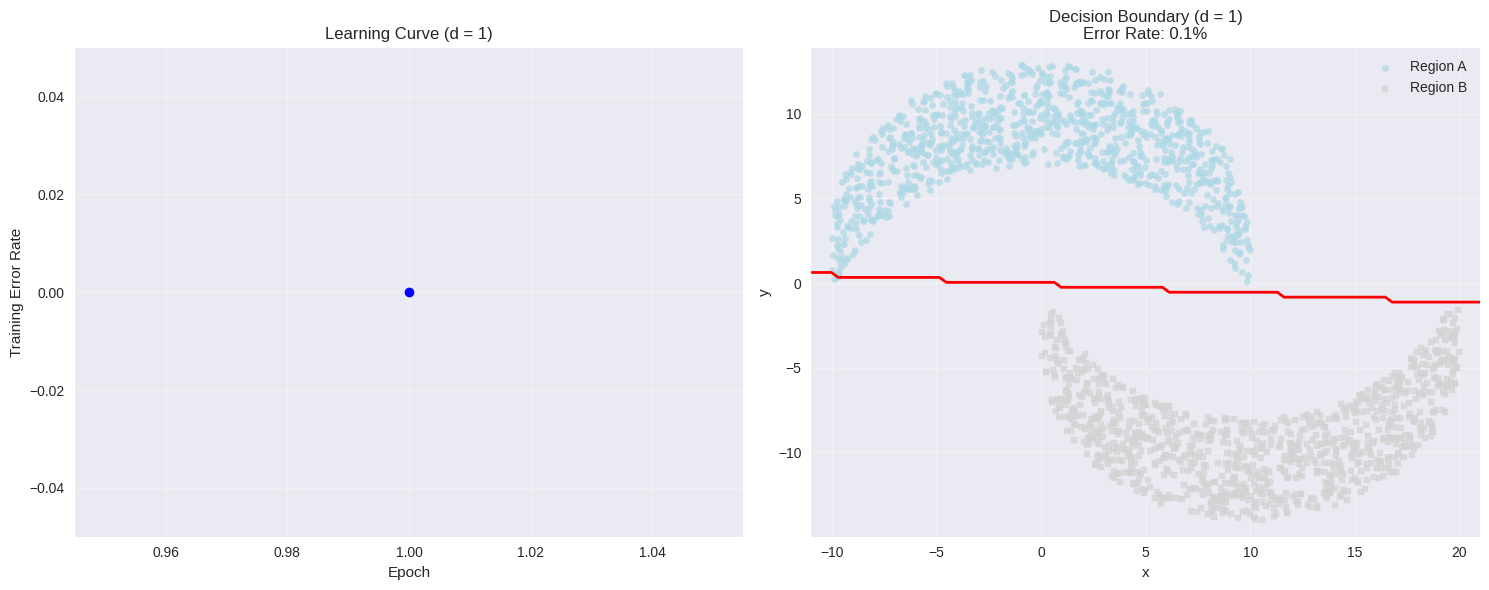


Rotating data by 30 degrees
Converged at epoch 1


/tmp/ipython-input-11-498873965.py:106: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, max(errors) * 1.1)


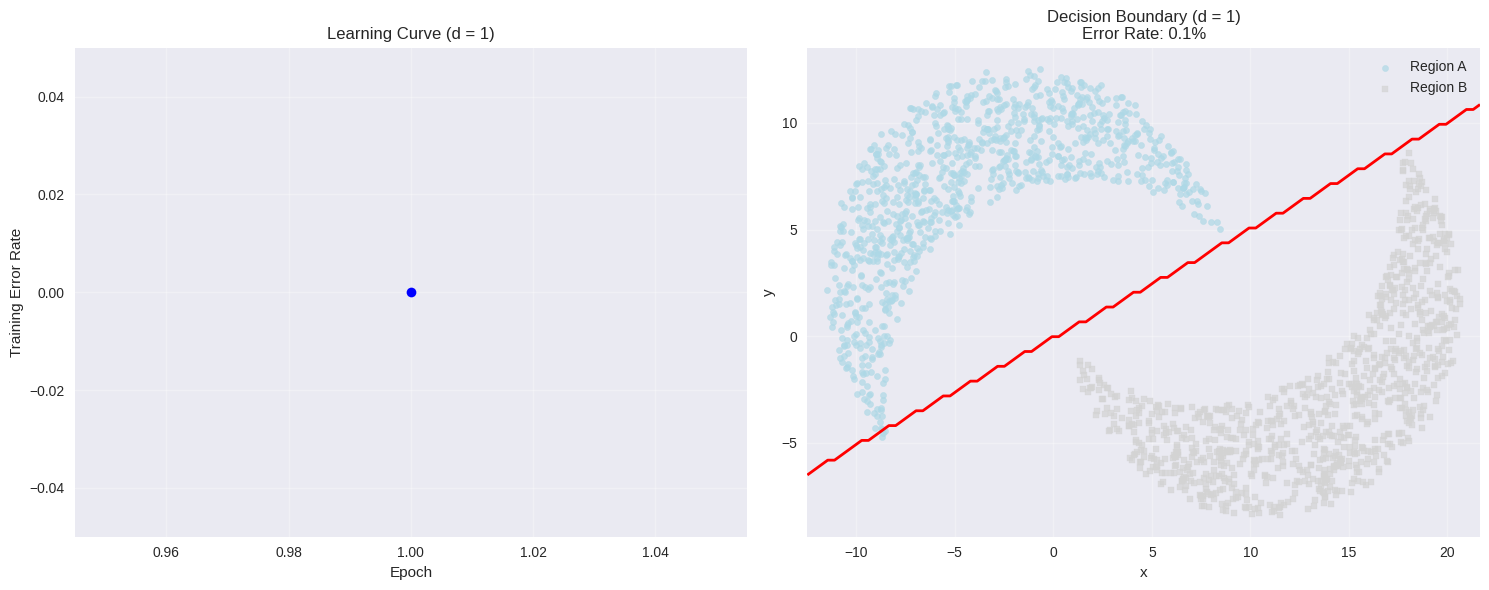


Rotating data by 60 degrees
Converged at epoch 1


/tmp/ipython-input-11-498873965.py:106: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, max(errors) * 1.1)


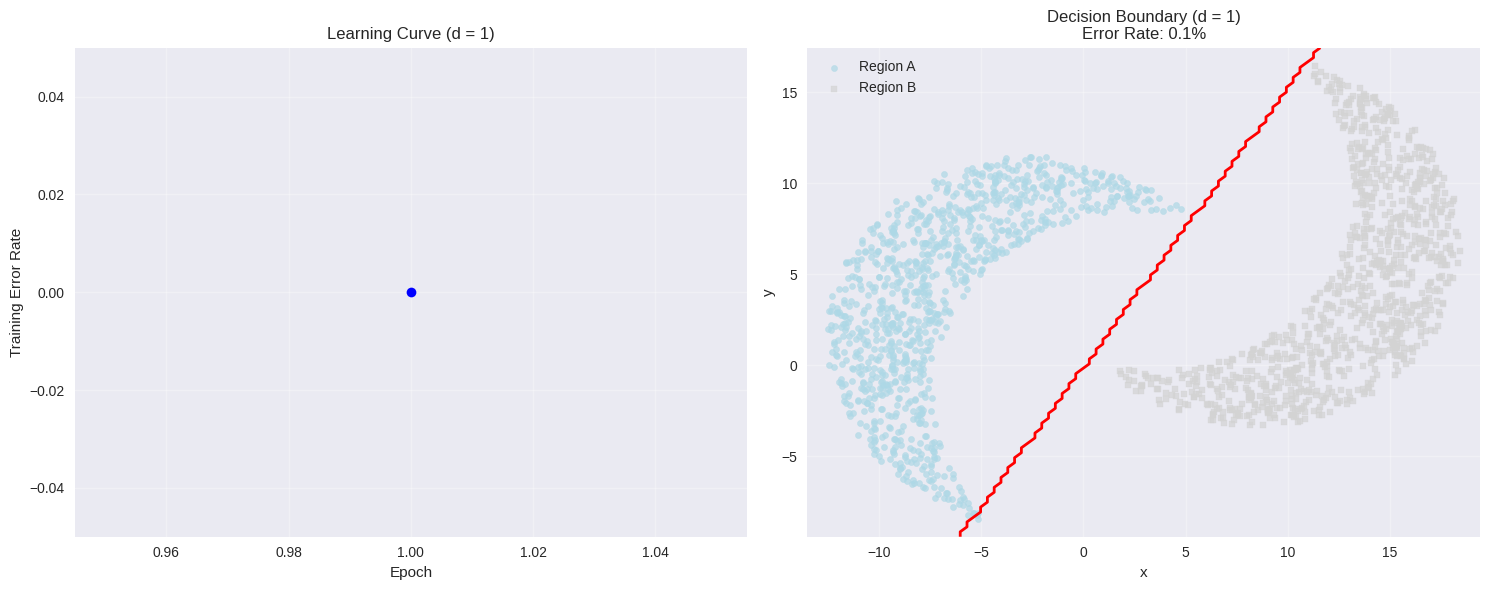


Rotating data by 90 degrees
Converged at epoch 1


/tmp/ipython-input-11-498873965.py:106: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, max(errors) * 1.1)


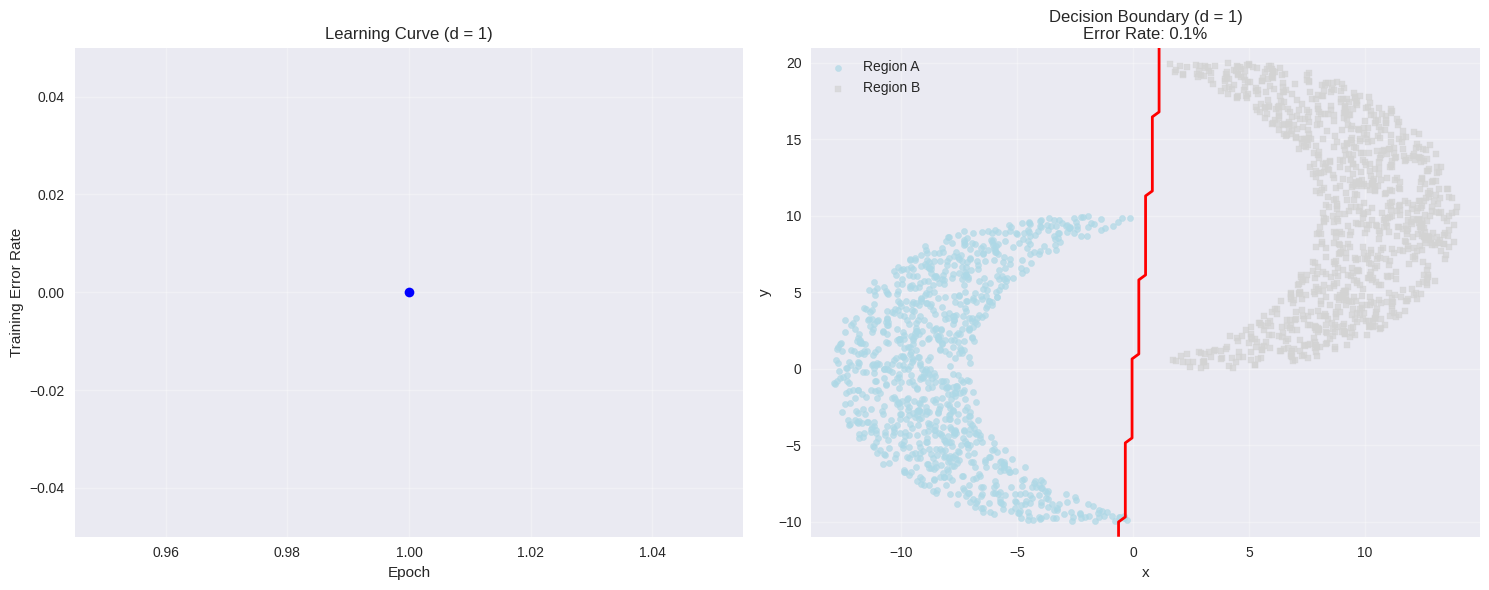


Rotating data by 120 degrees
Converged at epoch 1


/tmp/ipython-input-11-498873965.py:106: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, max(errors) * 1.1)


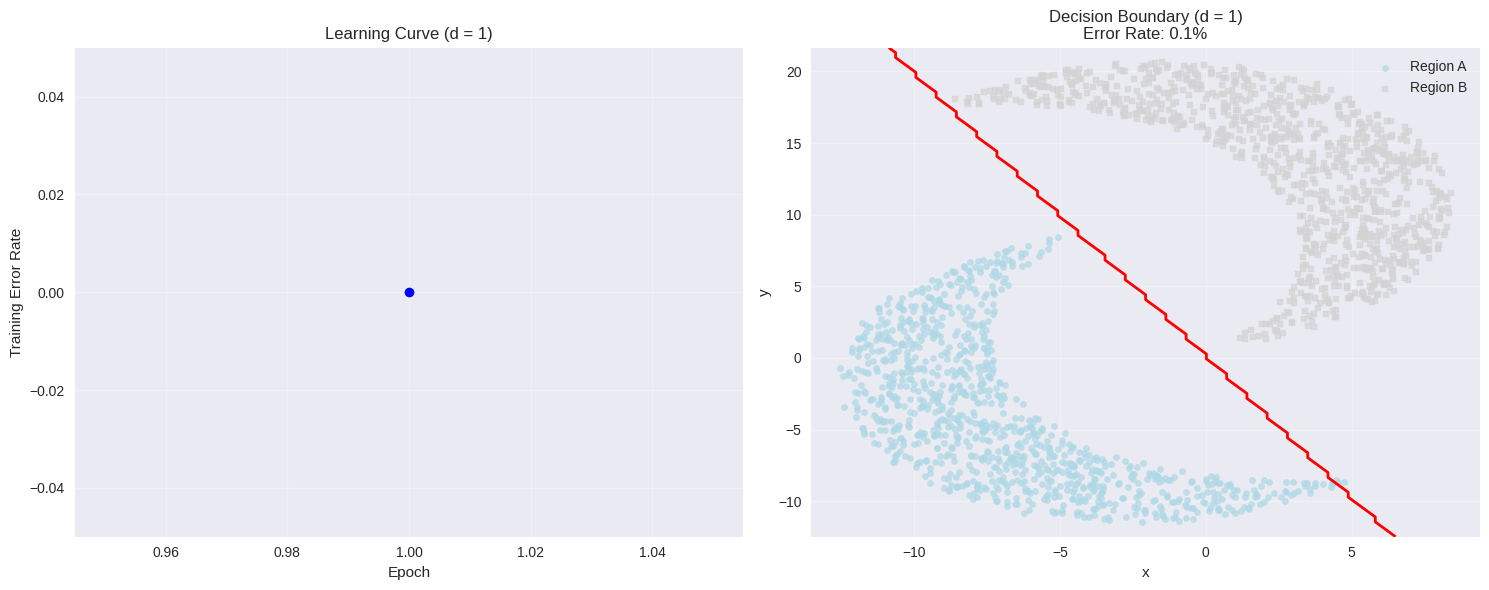


Rotating data by 150 degrees
Converged at epoch 1


/tmp/ipython-input-11-498873965.py:106: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, max(errors) * 1.1)


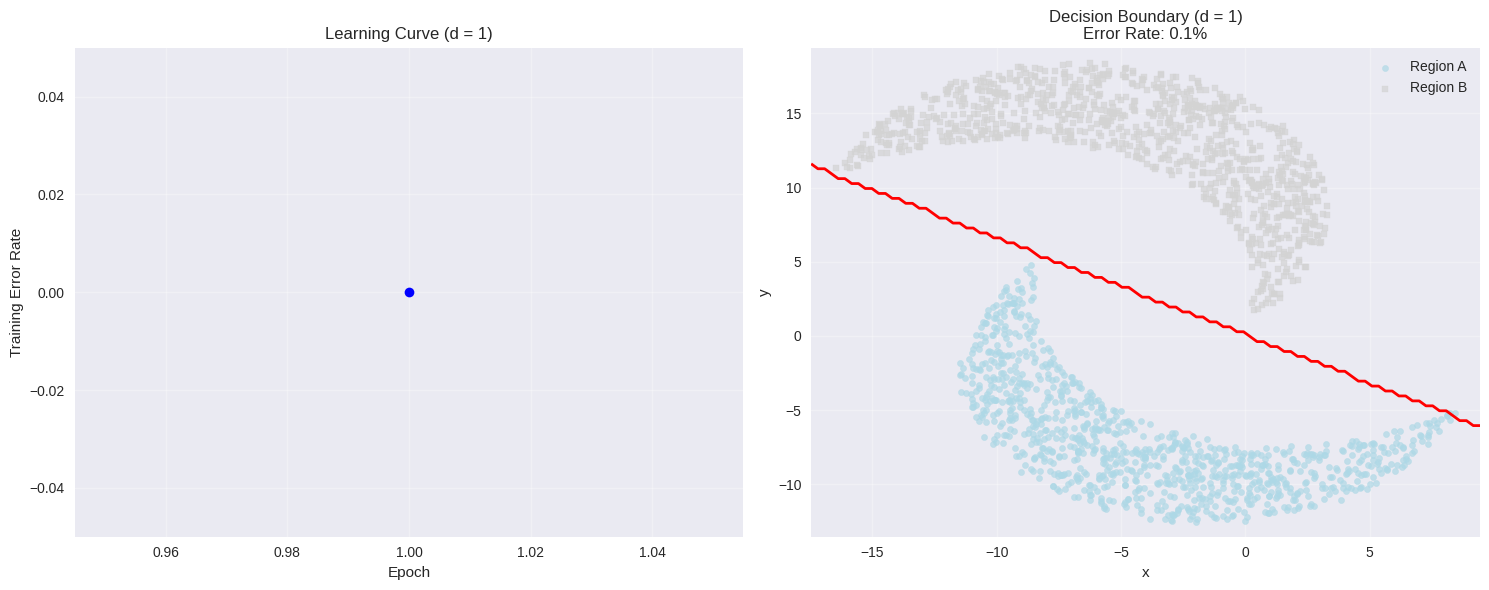


Rotating data by 180 degrees
Converged at epoch 1


/tmp/ipython-input-11-498873965.py:106: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, max(errors) * 1.1)


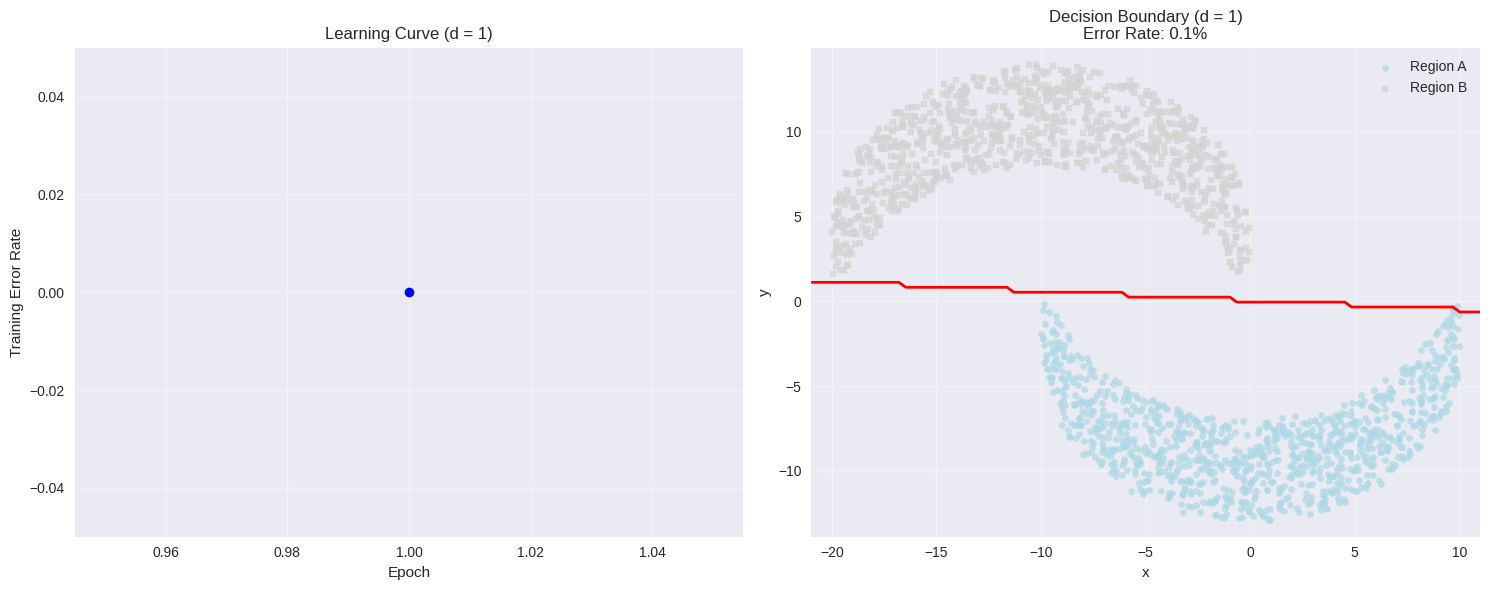


Summary of Rotation Experiments:
Angle:   0°, Accuracy: 99.85%, Error: 0.00%, Epochs: 1
Angle:  30°, Accuracy: 99.85%, Error: 0.00%, Epochs: 1
Angle:  60°, Accuracy: 99.85%, Error: 0.00%, Epochs: 1
Angle:  90°, Accuracy: 99.85%, Error: 0.00%, Epochs: 1
Angle: 120°, Accuracy: 99.85%, Error: 0.00%, Epochs: 1
Angle: 150°, Accuracy: 99.85%, Error: 0.00%, Epochs: 1
Angle: 180°, Accuracy: 99.85%, Error: 0.00%, Epochs: 1


In [12]:
# Run the experiment
if __name__ == "__main__":
    print("Double-Moon Classification Experiment")
    print("=====================================")
    # Set style
    plt.style.use('seaborn-v0_8')

    # Run experiments
    '''results = run_experiment([1, -4])

    # Print summary
    print(f"\n{'='*50}")
    print("EXPERIMENT SUMMARY")
    print(f"{'='*50}")

    for d, result in results.items():
        separability = "Linearly Separable" if d > 0 else "Non-linearly Separable"
        print(f"\nd = {d} ({separability}):")
        print(f"  Accuracy: {result['accuracy']:.1%}")
        print(f"  Error Rate: {(1-result['accuracy'])*100:.1f}%")
        print(f"  Epochs: {result['epochs_to_converge']}")'''
    experiment = DoubleMoonExperiment(d=1)

    rotated_results = experiment.run_with_rotations(
        angles=[0, 30, 60, 90, 120, 150, 180]
    )

    print("\nSummary of Rotation Experiments:")
    print("="*40)
    for angle, result in rotated_results.items():
        print(f"Angle: {angle:>3}°, Accuracy: {result['accuracy']:.2%}, "
              f"Error: {result['final_error']:.2%}, Epochs: {result['epochs']}")